# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but in non-COVID times we also have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [146]:
import pandas as pd
import numpy as np

In [147]:
!pip install xlrd

You should consider upgrading via the 'C:\Users\GonzalezD\scoop\apps\pyenv\current\pyenv-win\versions\3.10.3\python.exe -m pip install --upgrade pip' command.


In [148]:
df = pd.read_excel("KyotoFullFlower7.xls")

## 1. Read in the file using pandas, and look at the first five rows

* *Tip: You will probably need to pip install something to make this Excel file work!*

In [149]:
df.head()

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add **a parameter to make sure your columns look right**. How can you tell pandas to skip rows?

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [150]:
df = pd.read_excel("KyotoFullFlower7.xls", skiprows = 25, na_values={"Reference Name": ['-']})
df.head(30)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN
5,806,NaN,NaN,NaN,NaN,NaN
6,807,NaN,NaN,NaN,NaN,NaN
7,808,NaN,NaN,NaN,NaN,NaN
8,809,NaN,NaN,NaN,NaN,NaN
9,810,NaN,NaN,NaN,NaN,NaN


## 3. Look at the final five rows of the data

In [151]:
df.tail(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some NaN values

It looks like you should have NaN/missing values in the beginning of the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

* *Tip: it's another open with reading in the file!*

In [152]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")
df.columns = df.columns.str.replace("(", "")
df.columns = df.columns.str.replace(")", "")
df.head()

C:\Users\GonzalezD\AppData\Local\Temp\ipykernel_38000\2646959949.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace("(", "")
C:\Users\GonzalezD\AppData\Local\Temp\ipykernel_38000\2646959949.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(")", "")


,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 5. What reference is the most commonly used when figuring out cherry blossom flowering dates?

If the first result is `"-"`, you need to redo the last question.

In [153]:
df.reference_name.value_counts().sort_values(ascending=False)

NEWS-PAPER(ARASHIYAMA)                      94
SUGIURAKE-NIKKI                             38
MYOHOIN-HINAMIKI                            32
OYUDONONO-UENO-NIKKI                        26
OYUDONONO-UENO-NIKKI [EDA]                  21
DAIGOJI-ZATSUYO                             21
NIHONKIRYAKU                                19
SANETAKA-KOKI                               19
(SHIRYO-SORAN)                              15
KAKUMEIKI                                   15
ZOKU-SHIGUSHO                               14
NISUIKI                                     13
INRYOGEN-NICHIROKU                          13
MEIGETSUKI                                  12
GIENJUNKO-NIKKI(DAIGO)                      10
GUKANKI                                     10
MOTOHIRO-KOKI                                9
KANMON-GYOKI(FUSHIMI)                        9
KEIHAN RAILWAY ADV(ARASHIYAMA)               9
DAIGO-ZOJIKI                                 9
ZOKU-HONCHOTSUKAN                            8
TERUYOSHI-KOK

In [154]:
# The most commonly used is NEWS-PAPER(ARASHIYAMA)

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

In [155]:
df = df.dropna(subset=['full_flowering_date_doy'])
df.head()

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU


## 6.5 Confirm you now have 827 rows

In [156]:
df.shape

(827, 6)

## 7. Make a histogram of the full-flowering date

<AxesSubplot:>

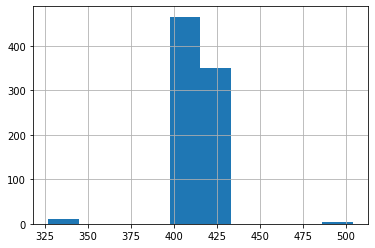

In [157]:
df.full_flowering_date.hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

<AxesSubplot:>

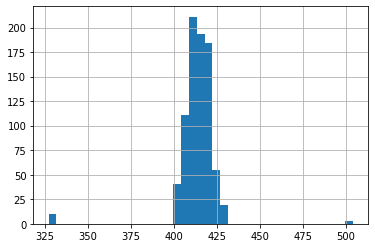

In [158]:
df.full_flowering_date.hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [159]:
df.full_flowering_date_doy.describe()

count    827.000000
mean     104.540508
std        6.407036
min       86.000000
25%      100.000000
50%      105.000000
75%      109.000000
max      124.000000
Name: full_flowering_date_doy, dtype: float64

In [160]:
# The average number of days is 104.5. There are 827 records.

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [161]:
df.query("ad < 1900").full_flowering_date_doy.mean()

105.20728291316527

## 11. How about after 1900?

In [162]:
df.query("ad > 1900").full_flowering_date_doy.mean()

100.3125

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [163]:
df.data_type_code.isin([4.0]).sum()

39

In [164]:
# Our data was 39 times from a title in Japanese poetry

## 13. Display the rows where our data was from a title in Japanese poetry

In [172]:
df[df.data_type_code.isin([4.0])]

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU
94,895,104.0,414.0,5.0,4.0,NIHONKIRYAKU
95,896,104.0,413.0,5.0,4.0,NIPPON-SANDAI-JITSUROKU
122,923,104.0,414.0,5.0,4.0,ZOKU-KOKIN-WAKASHU
154,955,89.0,330.0,5.0,4.0,SHUISHO
168,969,98.0,408.0,5.0,4.0,NIHONKIRYAKU
206,1007,106.0,416.0,5.0,4.0,MIDO-KAMPAKUKI
232,1033,102.0,412.0,5.0,4.0,NIHONKIRYAKU
235,1036,104.0,413.0,5.0,4.0,NIHONKIRYAKU
259,1060,108.0,417.0,5.0,4.0,SHIN-SENZAI-WAKASHU


## 14. Graph the full-flowering date (DOY) over time

<AxesSubplot:>

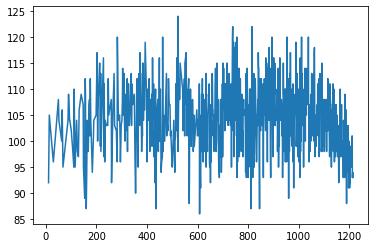

In [167]:
df.full_flowering_date_doy.plot()

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [173]:
df.rolling(10, on="ad", min_periods=5)["full_flowering_date_doy"].mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: full_flowering_date_doy, dtype: float64

In [174]:
df["rolling_date"] = df.rolling(10, on="ad", min_periods=5)["full_flowering_date_doy"].mean()
df.head()

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.0


<AxesSubplot:>

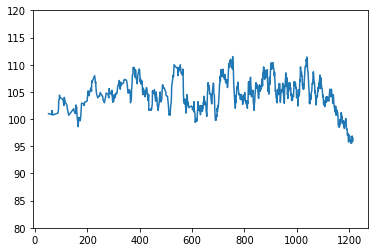

In [208]:
df.rolling_date.plot(x="ad", y="full_flowering_date_doy", ylim=(80, 120))

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

## 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

There are **at least two ways to do this.**

#### WAY ONE: The bad-yet-simple way

If you don't want to use `pd.to_datetime`, you can use this as an sample for updating March. It finds everything with a date less than 400 and assigns `March` to the `month` column:

```python
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'
```

#### WAY TWO: The good-yet-complicated way

* When you use `pd.to_datetime`, if pandas doesn't figure it out automatically you can also pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df.colname, "format='%Y-%m-%d")`.
* `errors='coerce'` will return `NaN` for missing values. By default it just yells "I don't know what to do!!!"
* And remember how we used `df.date_column.dt.month` to get the number of the month? For the name, you use `dt.strftime` (string-formatted-time), and pass it [the same codes](https://strftime.org/) to tell it what to do. For example, `df.date_column.dt.strftime("%Y-%m-%d")` would give you `"2020-04-09"`.

In [209]:
#df.loc[df["full_flowering_date"] < 400, 'month'] = 'March'
# df.head()

In [211]:
df["full_flowering_datetime"] = pd.to_datetime(df.full_flowering_date, format="%m%d", errors="coerce")
df.head()

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,month,full_flowering_datetime
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,NaN,1900-04-01
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,NaN,1900-04-15
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,NaN,1900-04-06
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,NaN,1900-04-18
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.0,NaN,1900-04-14


In [223]:
df.full_flowering_datetime.dt.strftime("%B")

11      April
14      April
30      April
50      April
52      April
63      April
65      April
68      April
88      April
90      April
91      April
93      April
94      April
95      April
101     April
107     April
111     April
112     April
116     April
122     April
125     April
129     April
132     April
140     April
148     April
149     April
154     March
156     April
157     April
158     April
159     April
160     March
162     April
164     April
165     April
166     April
168     April
171     April
173     April
174     April
176     April
178     April
184     April
188     April
190     April
199     April
203     April
205     April
206     April
213     April
215     April
216     April
217     April
218     April
228     April
230     April
231     April
232     April
233     April
235     April
240     April
245     April
247     April
249     April
259     April
260     April
265     April
270     April
272     April
279     April
282     April
283   

In [227]:
df["month"] = df.full_flowering_datetime.dt.strftime("%B")
df.head()

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,month,full_flowering_datetime
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,April,1900-04-01
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,April,1900-04-15
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,April,1900-04-06
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,1900-04-18
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.0,April,1900-04-14


## 17. Using your new column, how many blossomings happened in each month?

In [230]:
df.month.value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

## 18. Make a bar graph of how many blossomings happened in each month.

<AxesSubplot:>

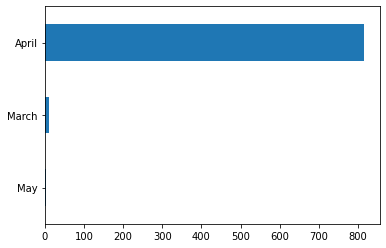

In [235]:
df.month.value_counts().sort_values(ascending=True).plot(kind='barh')

## 19. Adding a day-of-month column

Now we're going to add a new column called `day_of_month.`

*Tip: If you didn't drop the rows missing full-flowering dates earlier, it will yell at you about missing data. Go back up and fix Number 6!*

In [238]:
df["day_of_month"] = df.full_flowering_datetime.dt.strftime("%d")
df.head()

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,month,full_flowering_datetime,day_of_month
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,April,1900-04-01,01
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,April,1900-04-15,15
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,April,1900-04-06,06
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,1900-04-18,18
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.0,April,1900-04-14,14


## 20. Adding a date column

If you don't have a nice-looking date column yet, take the `'month'` and `'day_of_month'` columns and combine them in order to create a new column called `'date'`. By "nice looking," I mean it should say something like `April 11`.

* Instead of using the two existing columns, you could learn to use `.dt.strftime` as mentioned above.

In [241]:
df["date_column"] = df.full_flowering_datetime.dt.strftime("%B %d")
df.head()

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,month,full_flowering_datetime,day_of_month,date_column
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,April,1900-04-01,01,April 01
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,April,1900-04-15,15,April 15
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,April,1900-04-06,06,April 06
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,1900-04-18,18,April 18
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.0,April,1900-04-14,14,April 14


## 21. What day of the week do cherry blossoms like to blossom on?

Do they get the weekends off?

In [245]:
df["weekday"] = df.full_flowering_datetime.dt.strftime("%A")
df.head()

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,month,full_flowering_datetime,day_of_month,date_column,weekday
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,April,1900-04-01,01,April 01,Sunday
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,April,1900-04-15,15,April 15,Sunday
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,April,1900-04-06,06,April 06,Friday
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,1900-04-18,18,April 18,Wednesday
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.0,April,1900-04-14,14,April 14,Saturday


In [243]:
df.weekday.value_counts()

Sunday       140
Friday       120
Thursday     118
Saturday     114
Wednesday    113
Tuesday      112
Monday       110
Name: weekday, dtype: int64

In [ ]:
# The cherry blossoms are more likely to blossom on sunday, when people are more relaxed and likely to watch them. ;) 

# YOU ARE DONE.

And **incredible.**

In [ ]:
# Thank you!